In [71]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud
pio.templates.default = "plotly_white"


In [21]:
df = pd.read_csv('InstagramData.csv', encoding='cp1252') #I was getting some error with the utf-8
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [26]:
df.describe()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [23]:
#There are no missing values in the data. Count is same in every col

In [39]:
fig = go.Figure(data = [go.Histogram(x=df['Impressions'])])
fig.update_layout(
    title="Distribution of Impressions",
    xaxis_title="Impressions",
    yaxis_title="Count"
)
# Display the plot
pio.show(fig)

In [42]:
fig = go.Figure(data=[go.Scatter(y=df['Impressions'], mode='lines+markers')])
fig.update_layout(
    title='Number of Impressions Over Time',
    xaxis_title='Index',
    yaxis_title='Number of Impressions',
    xaxis=dict(tickangle=45),
    yaxis=dict(gridcolor='lightgray')
)

# Show plot
pio.show(fig)

In [195]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=df['Likes'], mode='lines+markers', name='Likes'))
fig.add_trace(go.Scatter(y=df['Saves'], mode='lines+markers', name='Saves'))
fig.add_trace(go.Scatter(y=df['Follows'], mode='lines+markers', name='Follows'))


fig.update_layout(
    title='Metrics Over Time',
    xaxis_title='Date',    yaxis_title='Count',
    xaxis=dict(tickangle=45),
    yaxis=dict(gridcolor='lightgray')
)

# Show plot
pio.show(fig)

In [61]:
df_pie = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']]
df_pie.head()
summary = df_pie.sum()
fig = go.Figure(data = [go.Pie(labels = summary.index, values = summary.values)])

# Customize layout
fig.update_layout(
    title='Reach form Different Sources',
    showlegend=True,
)

# Show plot
pio.show(fig)

In [62]:
df_pie = df[['Likes', 'Saves', 'Shares', 'Comments']]
df_pie.head()
summary = df_pie.sum()
fig = go.Figure(data = [go.Pie(labels = summary.index, values = summary.values)])

# Customize layout
fig.update_layout(
    title='Engagement Sources',
    showlegend=True,
)

# Show plot
pio.show(fig)

In [80]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming df_train is your training DataFrame containing 'Profile Visits' and 'Follows' columns
df_train = df[['Profile Visits', 'Follows']]

# Initialize the linear regression model
model = LinearRegression()

# Split features and target variable
Xtrain = df_train[['Profile Visits']]  # Feature matrix (input)
ytrain = df_train['Follows']            # Target variable (output)

# Fit the model to the training data
model.fit(Xtrain, ytrain)

# Predict the line based on the training data
line = model.predict(Xtrain)

# Create a scatter plot
fig = go.Figure(data=[go.Scatter(x=df['Profile Visits'], y=df['Follows'], mode='markers', name='Data Points')])

# Add the linear regression line to the plot
fig.add_trace(go.Scatter(x=df_train['Profile Visits'], y=line, mode='lines+markers', name='Linear Regression'))

# Customize layout
fig.update_layout(
    title='Profile Visits vs Follows',
    xaxis_title='Profile Visits',
    yaxis_title='Follows',
    showlegend=True
)

# Show the plot
pio.show(fig)


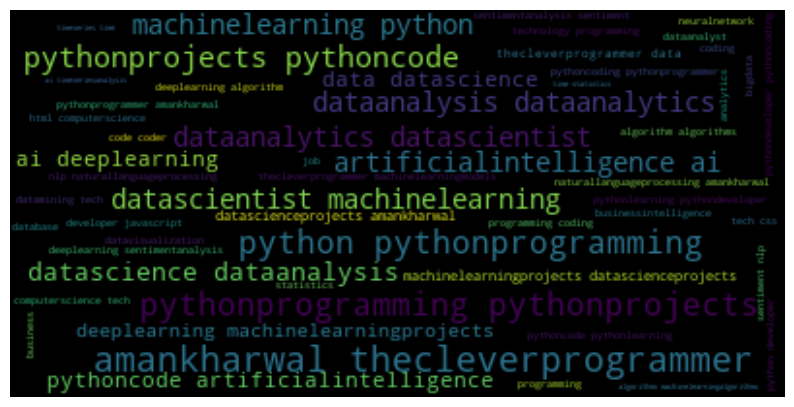

In [98]:
import matplotlib.pyplot as plt

hashtags = df['Hashtags'].sum()


# Create word cloud
wordcloud = WordCloud().generate_from_text(hashtags)
# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [101]:
correlation_matrix = df.corr()
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Blues'))

fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features')

pio.show(fig)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11120\3545829890.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [194]:
hashtags_list = df['Hashtags'].str.split().explode()
hashtags_list = hashtags_list.value_counts().reset_index()


In [128]:
fig = go.Figure(data = [go.Bar(x=hashtags_list['index'], y = hashtags_list['Hashtags'])])
fig.update_layout(
    title="Distribution of Hashtags",
    xaxis_title="Hashtags",
    yaxis_title="Count"
)
# Display the plot
pio.show(fig)

In [206]:

hashtags = df['Hashtags'].str.split().explode()
hashtag_likes = pd.DataFrame(hashtags, columns=['Hashtags'])
hashtag_likes['Likes'] = df['Likes']
hashtag_likes.head()

,Hashtags,Likes
0,#finance,162
0,#money,162
0,#business,162
0,#investing,162
0,#investment,162


In [198]:
hashtag_likes_merged = hashtag_likes.groupby('Hashtags')['Likes'].sum().to_frame()
hashtag_likes_merged.reset_index(inplace=True)
hashtag_likes_merged = hashtag_likes_merged.sort_values(by='Likes', ascending=False)

fig = go.Figure(data = [go.Bar(x=hashtag_likes_merged['Hashtags'], y = hashtag_likes_merged['Likes'])])
fig.update_layout(
    title="Likes Distribution for Each Hashtag",
    xaxis_title="Hashtags",
    yaxis_title="Likes"
)
# Display the plot
pio.show(fig)


In [207]:
hashtags = df['Hashtags'].str.split().explode()
hashtag_impressions = pd.DataFrame(hashtags, columns=['Hashtags'])
hashtag_impressions['Impressions'] = df['Impressions']
hashtag_impressions.head()


,Hashtags,Impressions
0,#finance,3920
0,#money,3920
0,#business,3920
0,#investing,3920
0,#investment,3920


In [210]:
hashtag_imps_merged = hashtag_impressions.groupby('Hashtags')['Impressions'].sum().to_frame()
hashtag_imps_merged.reset_index(inplace=True)
hashtag_imps_merged = hashtag_imps_merged.sort_values(by='Impressions', ascending=False)

fig = go.Figure(data = [go.Bar(x=hashtag_imps_merged['Hashtags'], y = hashtag_imps_merged['Impressions'])])
fig.update_layout(
    title="Impressions Distribution for Each Hashtag",
    xaxis_title="Hashtags",
    yaxis_title="Impressions"
)
# Display the plot
pio.show(fig)


# **Instagram Data Analysis Summary**

**The Problem**

Analyzing and enhancing the reach of AICP’s Instagram posts.

**Data and Methods**

I received a dataset of details of 119 Instagram posts including the number of Likes, Impressions, saves, comments, shares, profile visits and follows against each post. The data also information about the sources from which each post was accessed. By applying different data visualization techniques, I analyzed the reach of each post with respect to the impressions it received. Moreover, a model was trained which can predict the number of follows based on the profile visits. The reach from different sources was also analyzed along with a thorough analysis if the hashtags and their individual effectiveness.

**Results and Interpretations** 

•	The maximum reach is received from the Instagram homepage and hashtags.

 
•	After identifying their significance, the hashtags were further analyzed and those hashtags which give the maximum reach were identified.
 
**Recommendations and Conclusions**

Following are the recommended steps for increasing the reach of posts.
•	The identified hashtags should be used frequently. 
•	More investments should be made on the homepage such as paid promotions and related tools. 

**Executive Summary**
 
This report presents an analysis of Instagram post reach for the Artificial Intelligence Community of Pakistan (AICP), aimed at enhancing their social media engagement. Utilizing a dataset comprising details of 119 Instagram posts, including metrics such as Likes, Impressions, saves, comments, shares, profile visits, and follows, various data visualization techniques were employed to assess post reach relative to impressions received. A predictive model was developed to estimate follows based on profile visits, providing insights into user behavior. 
Analysis revealed that maximum reach is attained through the Instagram homepage and hashtags, with specific hashtags identified for optimal engagement. Recommendations include the frequent use of identified hashtags and increased investment in homepage promotions to amplify post visibility and engagement. These strategies aim to augment AICP's online presence and foster broader community engagement.
